In [1]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt

In [37]:
all_songs = pd.read_csv("output.csv")
original = pd.read_csv("total2.csv")
all_songs = all_songs.select_dtypes(exclude = ["object"])
all_songs = all_songs.drop("Unnamed: 0", axis = 1)
all_songs["explicit"] = all_songs["explicit"].astype("int")
all_songs_small = all_songs.iloc[:, 0:12]

In [3]:
all_songs_small.describe()

,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000
mean,51.320518,0.452268,0.648400,0.618577,-7.141078,0.634125,0.132228,0.259913,0.023135,0.188862,0.488210,118.628743
std,24.249319,0.497824,0.156772,0.193416,3.080693,0.481779,0.122646,0.268272,0.127786,0.148334,0.225932,28.553310
min,0.000000,0.000000,0.064600,0.018800,-29.484000,0.000000,0.023100,0.000083,0.000000,0.023200,0.033800,51.660000
25%,39.000000,0.000000,0.555500,0.492000,-8.442000,0.000000,0.043450,0.045300,0.000000,0.096350,0.315500,95.404000
50%,58.000000,0.000000,0.671000,0.641000,-6.568000,1.000000,0.077600,0.160000,0.000000,0.128000,0.478000,119.796000
75%,69.000000,1.000000,0.758000,0.766000,-5.108500,1.000000,0.190500,0.398000,0.000020,0.237000,0.660000,137.975000
max,99.000000,1.000000,0.974000,0.981000,0.366000,1.000000,0.856000,0.995000,0.985000,0.973000,0.979000,207.673000


In [4]:
dance_bar = all_songs["danceability"]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


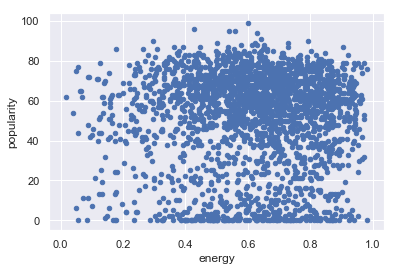

In [7]:
all_songs_small.plot.scatter(x = "energy", y = "popularity")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


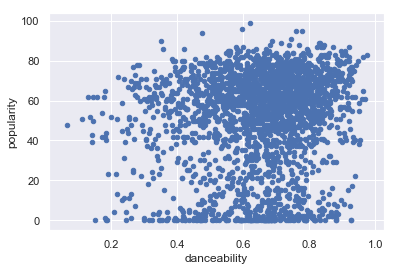

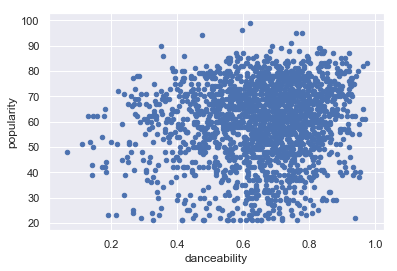

In [22]:
all_songs_small.plot.scatter(x = "danceability", y = "popularity")
great_twenty = all_songs_small[all_songs_small["popularity"] > 20.0]
great_twenty.plot.scatter(x = "danceability", y = "popularity")

In [23]:
all_songs_small.corr()

,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.087649,0.128836,0.036584,0.145756,-0.026948,0.037336,-0.039659,-0.112990,-0.018622,0.015456,0.022274
explicit,0.087649,1.000000,0.329451,0.084900,0.141566,-0.106180,0.421437,-0.218509,-0.153968,0.071717,-0.097793,0.061165
danceability,0.128836,0.329451,1.000000,0.212939,0.296433,-0.095222,0.163482,-0.347834,-0.247299,-0.053162,0.353274,0.036572
energy,0.036584,0.084900,0.212939,1.000000,0.746328,-0.094940,0.062253,-0.601947,-0.200075,0.152238,0.382993,0.157326
loudness,0.145756,0.141566,0.296433,0.746328,1.000000,-0.091190,-0.003576,-0.505540,-0.359722,0.068711,0.276358,0.111239
mode,-0.026948,-0.106180,-0.095222,-0.094940,-0.091190,1.000000,-0.072856,0.114817,-0.016182,0.003707,-0.013170,-0.030315
speechiness,0.037336,0.421437,0.163482,0.062253,-0.003576,-0.072856,1.000000,-0.099731,-0.121527,0.090972,0.043555,0.106939
acousticness,-0.039659,-0.218509,-0.347834,-0.601947,-0.505540,0.114817,-0.099731,1.000000,0.186022,-0.055139,-0.163260,-0.167965
instrumentalness,-0.112990,-0.153968,-0.247299,-0.200075,-0.359722,-0.016182,-0.121527,0.186022,1.000000,-0.038377,-0.171681,-0.046383
liveness,-0.018622,0.071717,-0.053162,0.152238,0.068711,0.003707,0.090972,-0.055139,-0.038377,1.000000,0.060749,0.034590


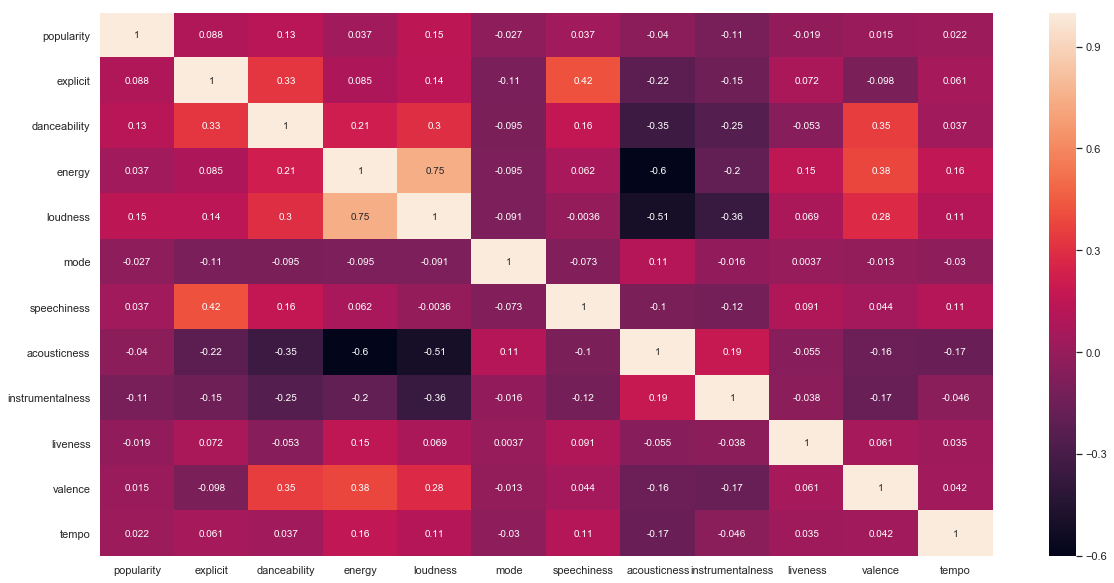

In [14]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(all_songs_small.corr(), annot = True, ax= ax)

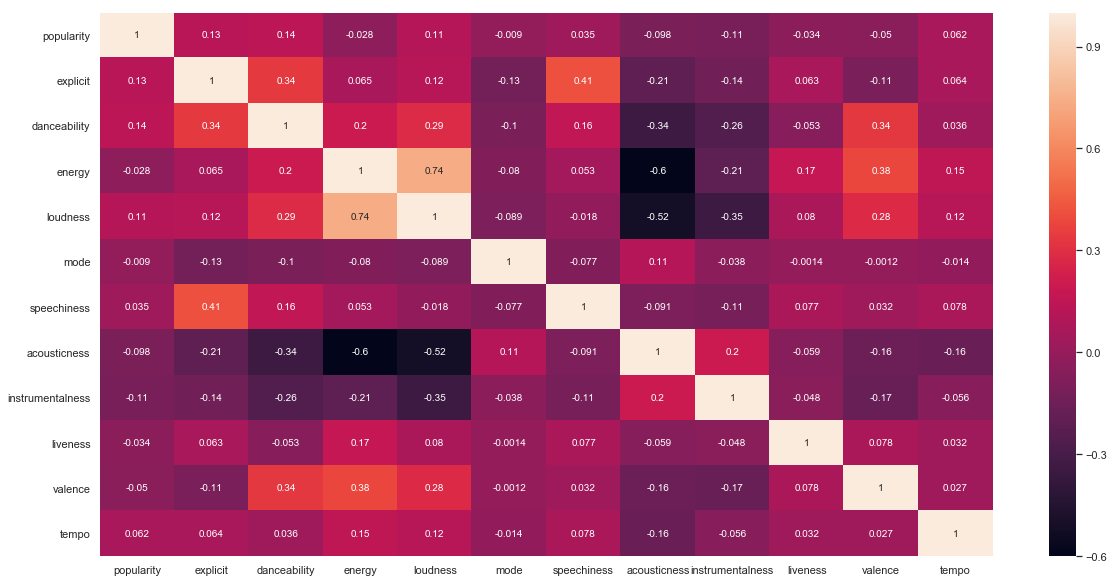

In [24]:
fig1, ax1 = plt.subplots(figsize = (20, 10))
sns.heatmap(great_twenty.corr(), annot = True, ax= ax1)

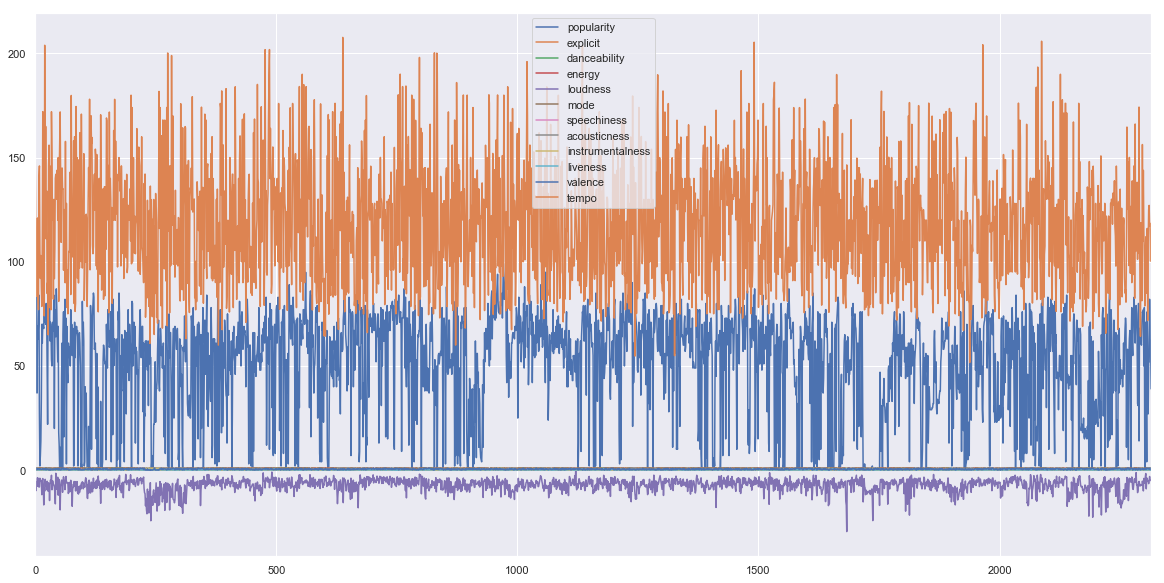

In [31]:
all_songs_small.plot.line(figsize = (20, 10))